In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
import numpy as np
import pandas as pd

In [4]:
#import data visualization library
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#import dataset
dataset=pd.read_csv('Admission_Predict.csv')

In [6]:
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [7]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
dataset = dataset.drop(['Serial No.','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research'], axis = 1 )

In [9]:
dataset

,GRE Score,Chance of Admit
0,337,0.92
1,324,0.76
2,316,0.72
3,322,0.80
4,314,0.65
...,...,...
495,332,0.87
496,337,0.96
497,330,0.93
498,312,0.73


In [10]:
dataset.head()

,GRE Score,Chance of Admit
0,337,0.92
1,324,0.76
2,316,0.72
3,322,0.80
4,314,0.65


In [11]:
x = dataset.iloc[:,0]

In [12]:
x.shape

(500,)

In [46]:
x = dataset.iloc[:,0].values.reshape(-1,1)

In [29]:
x.shape

(500, 1)

In [16]:
x

array([[337],
       [324],
       [316],
       [322],
       [314],
       [330],
       [321],
       [308],
       [302],
       [323],
       [325],
       [327],
       [328],
       [307],
       [311],
       [314],
       [317],
       [319],
       [318],
       [303],
       [312],
       [325],
       [328],
       [334],
       [336],
       [340],
       [322],
       [298],
       [295],
       [310],
       [300],
       [327],
       [338],
       [340],
       [331],
       [320],
       [299],
       [300],
       [304],
       [307],
       [308],
       [316],
       [313],
       [332],
       [326],
       [322],
       [329],
       [339],
       [321],
       [327],
       [313],
       [312],
       [334],
       [324],
       [322],
       [320],
       [316],
       [298],
       [300],
       [311],
       [309],
       [307],
       [304],
       [315],
       [325],
       [325],
       [327],
       [316],
       [318],
       [328],
       [332],
      

In [48]:
y = dataset.iloc[:,1].values.reshape(-1,1)

In [43]:
y.shape

(500, 1)

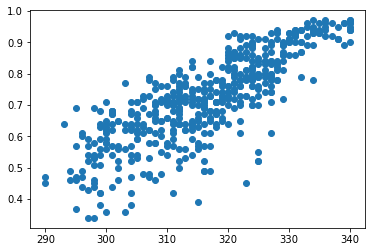

In [49]:
plt.scatter(x,y)
plt.show()

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 ,random_state=0)

In [54]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((400, 1), (100, 1), (400, 1), (100, 1))

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lm=LinearRegression()

In [57]:
lm.fit(x_train,y_train)

LinearRegression()

In [58]:
y_pred = lm.predict(x_test)

In [60]:
#y_pred

In [61]:
check = pd.DataFrame(x_test,columns = ['GRE Score'])

In [63]:
#check

In [64]:
check['COA_Actual'] = y_test

In [65]:
check

,GRE Score,COA_Actual
0,318,0.64
1,321,0.85
2,321,0.80
3,328,0.91
4,301,0.68
...,...,...
95,336,0.95
96,316,0.64
97,305,0.53
98,309,0.48


In [66]:
check['COA predicted'] = y_pred

In [67]:
check

,GRE Score,COA_Actual,COA predicted
0,318,0.64,0.738412
1,321,0.85,0.769423
2,321,0.80,0.769423
3,328,0.91,0.841784
4,301,0.68,0.562680
...,...,...,...
95,336,0.95,0.924481
96,316,0.64,0.717738
97,305,0.53,0.604029
98,309,0.48,0.645377


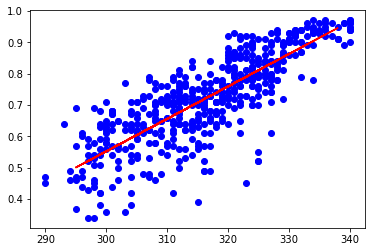

In [68]:
plt.scatter(x,y,color='blue')
plt.plot(x_test,y_pred,color='red')